# Logistic Regression Example 

Reference: https://towardsdatascience.com/logistic-regression-with-pytorch-3c8bbea594be. 

This notebook presents how to use PyTorch for building logistic regression model for classification problem. In this example, we will first generate a dataset where there are two clusters formed by the data points. Later, we pre-process the data (Normalization) and develop the regression model to determine the decision boundary between two cluster. 


## Review of Logistic Regression 

Logistic regression is a learning algorithm to determine the decision boundary of the data points for classification problem. Therefore, when new data comes, we can instantly determine which classes do the data points belong to. Logistic regression is an example of General linear models once we take logarithm, thus it shares similarities between the linear regression like the formula of (stochastic) gradient descent. The logistic regression is described by 

\begin{align}
z &= w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + \beta = w^{T}x ,w^{T} = [\beta, w_1, \cdots, w_n] \\
\hat y &= f(z) =  \frac{1}{1 + e^{-z}}, ~ f(z) \in {0,1}
\end{align}

where $f(z)$ is the sigmoid function which image lies between 0 and 1. Therefore, we can use sigmoid function for binary classification once we re-label the classes using 0 and 1. Unlike the linear regession, we use cross entropy as the loss funcation instead of MSE. This can be proven by the GLM derivation. The cross entropy loss function is 

\begin{align}
J(\hat y) = \sum^{m}_{i=1} y_i \log \hat y_i + (1 - y_i) \log (1- \hat y_i)
\end{align}

where $y_i$ and $\hat y_i$ are the true and predicted values, respectively. For the back-propagation part, we need to use the loss function for calculating the gradient descent and it indicates how well the model under training, thus the loss function is important. 

In [5]:
import torch 
import torch.nn as nn 
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt 
from tqdm import tqdm

In [6]:
# Hparams 
epochs = 20000
input_size = 2 # Numbers of features 
output_size = 1 # real scalar function between [0,1]
num_classes = 2 # two groups 
class_size = 1000
learning_rate = 0.01

# Red Datapoints
red_x = torch.randn(class_size)
red_y = torch.normal(1,0.5, (class_size, 1)).reshape(class_size)
red = torch.stack((red_x, red_y), dim=1)

# Blue Datapoints 
blue_x = torch.randn(class_size) + 2
blue_y = torch.normal(3,0.5, (class_size, 1)).reshape(class_size)
blue = torch.stack((blue_x, blue_y), dim=1)


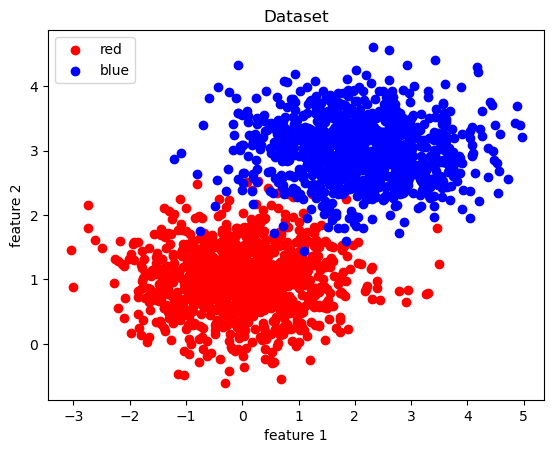

In [7]:
# Plot the data set red and blue 

plt.title("Dataset")
plt.scatter(red[:,0], red[:,1], label='red', c='red')
plt.scatter(blue[:,0], blue[:,1], label='blue', c='blue')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

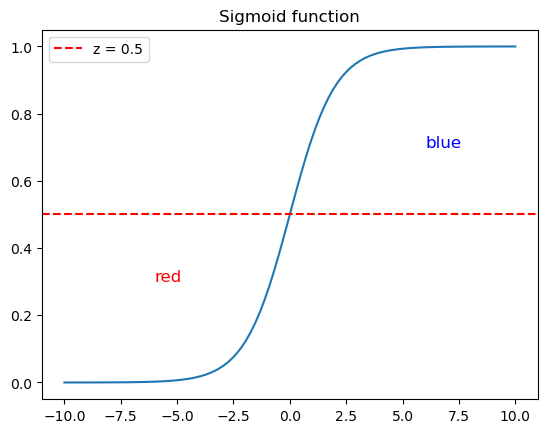

In [8]:
# Sigmoid function plot 
plt.title("Sigmoid function")
z = torch.linspace(-10,10,100)
f = torch.sigmoid(z)
plt.plot(z, f)
plt.axhline(y=0.5, color='red', linestyle='--',label='z = 0.5')
plt.text(-6,0.3,'red', fontsize=12, color='red')
plt.text(6,0.7,'blue', fontsize=12, color='blue')
plt.legend()

In [9]:
# Logistic Regression in Troch 

class LogisticRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, data):
        output = self.linear(data)
        return torch.sigmoid(output)
    

model = LogisticRegression(input_size, output_size)
# model = nn.Linear(input_size, 1)


criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [10]:
# Data Set 
X = torch.cat((red, blue), dim=0)

red_label = torch.ones(class_size)
blue_label = torch.zeros(class_size)

# Label of red = 0 / blue = 1 
labels = torch.cat((red_label, blue_label), dim = 0).long()

In [11]:
# class CustomDataset(Dataset):
#     def __init__(self, features, labels):
#         self.features = features
#         self.labels = labels
    
#     def __len__(self):
#         return len(self.features)
    
#     def __getitem__(self, index):
#         return self.features[index], self.labels[index]
        
# dataset = CustomDataset(X, labels)

In [12]:
X_train, X_test, y_train,  y_test = train_test_split(
    X, labels, test_size=0.33, random_state=42)


In [13]:

iter = 0
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    outputs = outputs.reshape(labels.shape)
    loss = criterion(outputs, labels.float()) # [200,1] -squeeze-> [200]
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    iter += 1 
    if (iter+1) % 1000 == 0:
            print ('Loss: {:.4f}'.format(loss.item()))

Training Epochs:   0%|          | 0/20000 [00:00<?, ?it/s]

Training Epochs:  10%|█         | 2062/20000 [00:00<00:02, 7091.20it/s]

Loss: 0.3577
Loss: 0.2589


Training Epochs:  22%|██▏       | 4340/20000 [00:00<00:02, 7478.34it/s]

Loss: 0.2073
Loss: 0.1752


Training Epochs:  29%|██▉       | 5855/20000 [00:00<00:01, 7529.93it/s]

Loss: 0.1533
Loss: 0.1376


Training Epochs:  41%|████      | 8127/20000 [00:01<00:01, 7436.53it/s]

Loss: 0.1257
Loss: 0.1164


Training Epochs:  52%|█████▏    | 10325/20000 [00:01<00:01, 7154.20it/s]

Loss: 0.1089
Loss: 0.1027


Training Epochs:  59%|█████▉    | 11797/20000 [00:01<00:01, 7261.31it/s]

Loss: 0.0975
Loss: 0.0931


Training Epochs:  70%|███████   | 14056/20000 [00:01<00:00, 7453.75it/s]

Loss: 0.0893
Loss: 0.0860


Training Epochs:  82%|████████▏ | 16336/20000 [00:02<00:00, 7512.24it/s]

Loss: 0.0830
Loss: 0.0805


Training Epochs:  89%|████████▉ | 17828/20000 [00:02<00:00, 7292.97it/s]

Loss: 0.0781
Loss: 0.0761


Training Epochs: 100%|██████████| 20000/20000 [00:02<00:00, 7297.19it/s]

Loss: 0.0742
Loss: 0.0724


In [17]:
w = [*model.parameters()][0]
b = [*model.parameters()][1]

(w,b)

(Parameter containing:
 tensor([[-1.1175, -2.7409]], requires_grad=True),
 Parameter containing:
 tensor([6.4170], requires_grad=True))

Text(0.5, 1.0, 'Decision Boundary and the data set')

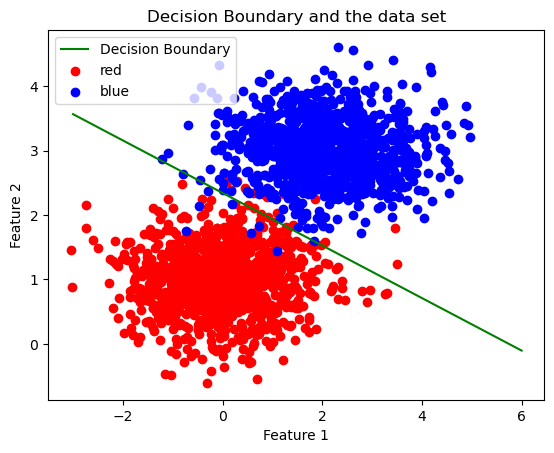

In [18]:
# Generate x values for plotting the decision boundary
w = w.detach().numpy()
b = b.detach().numpy()

x = np.linspace(-3, 6, 100)

# Calculate the corresponding y values using the decision boundary equation
y = (-w[0, 0] / w[0, 1]) * x - b / w[0, 1]

# # Generate random data points for visualization
# labels = np.where(w[0, 0] * data_x + w[0, 1] * data_y + b >= 0, 1, 0)

# Plot the data points and the decision boundary
plt.plot(x, y, color='green', label='Decision Boundary')
plt.title("Dataset")
plt.scatter(red[:,0], red[:,1], label='red', c='red')
plt.scatter(blue[:,0], blue[:,1], label='blue', c='blue')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary and the data set')